##Q1. 
Implement non-linear perceptron algorithm for the classification using Hebbian Learning rule. The
dataset (data55.mat) contains 4 features and the last column is the output (class label). You can use
hold-out cross-validation (70, 10, and 20%) for the selection of training, validation and test
instances. Evaluate accuracy, sensitivity and specificity measures for the evaluation of test
instances. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning
toolbox etc. are not allowed). [Marks=5]

In [1]:
%cd "/content/drive/My Drive/3-1/NNFL/edwinthomas_assignment2/data/"

/content/drive/My Drive/3-1/NNFL/edwinthomas_assignment2/data


In [77]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
np.random.seed(1)

In [3]:
D = pd.read_excel("data55.xlsx")
D = np.array(D)
np.random.shuffle(D)
X1 = D[:,:-1]
Y1 = D[:,-1]
X_ = X1.copy()
X_ = (X_ - X_.mean())/X_.std()
Y_ = Y1.copy()
Y_ = [int(x) for x in Y_]
m,n = np.shape(X_)
k = (np.unique(Y_).shape)
alpha = 0.01
iter = 1000
X, Y = X_[:int(0.7*m)], Y_[:int(0.7*m)]
X_val, Y_val  = X_[int(0.7*m):int(0.8*m)], Y_[int(0.7*m):int(0.8*m)]
X_test, Y_test = X_[int(0.8*m):], Y_[int(0.8*m):]
m_test = int(0.7*m)

In [4]:
def sigmoid(n):
  return 1/(1+np.exp(n))

def nonlin_perceptron_forward(X,w,b, return_a = False):
    a = []
    hyp = []
    m,n = np.shape(X)
    for i in range(m):
        sum = 0
        for j in range(n):
            sum = sum + w[j]*X[i][j]
        sum = sum + b
        hyp.append(1/(1+np.exp(-sum)))
        a.append(sum)
    if return_a:
        return hyp,a
    else:
        return hyp

def hebbian_learning(w,b,X,Y,Y_pred,alpha):
    m,n = np.shape(X)
    for i in range(m):
        if Y[i] != Y_pred[i]:
            for j in range(n):
                w[j] = w[j] + (alpha*Y[i]*X[i][j])
            b = b + (alpha*Y[i]) 
    return w,b

In [5]:
#Initializing the weights and bias
w = np.random.rand(n)
b = np.random.rand()
print(w,b)

[0.04534573 0.13996612 0.79240359 0.02980136] 0.8831254758194231


In [6]:
for i in range(iter):
    Y_pred = nonlin_perceptron_forward(X,w,b)
    Y_pred = [int(x) for x in Y_pred]
    w,b = hebbian_learning(w,b,X,Y,Y_pred,alpha)

In [7]:
#Confusion Matrix for training
confmat = cm(Y,Y_pred)
Accuracy = (confmat[0][0]+confmat[1][1])/len(Y)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])

print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}")

Accuracy: 89.85507246376811%
Sensitivity: 1.0
Specificity: 0.78125


In [8]:
#Validation
Y_pred = [int(x) for x in nonlin_perceptron_forward(X_val,w,b)]
confmat = cm(Y_val,Y_pred)

Accuracy = (confmat[0][0]+confmat[1][1])/len(Y_val)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])

print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}")

Accuracy: 80.0%
Sensitivity: 1.0
Specificity: 0.5


In [9]:
#Testing
Y_pred = [int(x) for x in nonlin_perceptron_forward(X_test,w,b)]
confmat = cm(Y_test,Y_pred)

Accuracy = (confmat[0][0]+confmat[1][1])/len(Y_test)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])

print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}")

Accuracy: 95.0%
Sensitivity: 1.0
Specificity: 0.9230769230769231


##Q2.
 Implement kernel perceptron algorithm for the classification. The dataset (data55.mat) contains 4
features and the last column is the output (class label). You can use hold-out cross-validation (70,
10, and 20%) for the selection of training, validation and test instances. Evaluate accuracy,
sensitivity and specificity measures for the evaluation of test instances. (You can use RBF, and
polynomial kernels). (Packages such as keras, tensorflow, pytorch for python and MATLAB deep
learning toolbox etc. are not allowed). [Marks=5]

In [10]:
from sklearn.model_selection import train_test_split
np.random.seed(1)

In [11]:
df = pd.read_excel('data55.xlsx', header=None)
df = df.values
p = np.linspace(0, 99, 100)
np.random.shuffle(df)
X_ = df[:,:-1]
Y = df[:,-1]
X = (X_ - X_.mean()) / X_.std()
for i in range(len(X)):
    if (Y[i] == 0):
        Y[i] = -1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [12]:
y = np.zeros((1, len(X_train)))
alpa = np.zeros((1, len(X_train)))
t = 200
k = np.zeros((len(X_train), len(X_train)))

for i in range(len(X_train)):
    for j in range(len(X_train)):
        p = X_train[i] * X_train[j]
        k[i, j] = p.sum()

for i in range(t):
    for j in range(len(X_train)):
        for c in range(len(X_train)):
            y[0, j] = y[0, j] + alpa[0, c] * Y_train[c] * k[c, j]
        y[0, j] = np.sign(y[0, j])
        if (y[0, j] != Y[j]):
            alpa[0, j] = alpa[0, j] + 1
Kte = np.zeros((len(X_test), len(X_train)))
for i in range(len(X_test)):
    for j in range(len(X_train)):
        l = X_test[i] * X_train[j]
        Kte[i, j] = l.sum()
Y_pred = np.zeros((1, len(X_test)))
for z in range(len(X_test)):
    for c in range(len(X_train)):
        Y_pred[0, z] = Y_pred[0, z] + alpa[0, c] * Y_train[c] * Kte[z, c]
    Y_pred[0, z] = np.sign(Y_pred[0, z])
for i in range(len(Y_test)):
    if (Y_test[i] == -1):
        Y_test[i] = 0
for i in range(len(Y_test)):
    if (Y_pred[0, i] == -1):
        Y_pred[0, i] = -0

In [13]:
Y_pred = Y_pred[0]
confmat = cm(Y_test, Y_pred)
Accuracy = (confmat[0][0]+confmat[1][1])/len(Y_pred)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
print("Confusion Matrix:")
print(confmat)
print("\n")
print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}\n")

Confusion Matrix:
[[14  0]
 [ 0 16]]


Accuracy: 100.0%
Sensitivity: 1.0
Specificity: 1.0



##Q3. 
The dataset (data5.mat) contains 72 features and the last column is the output (class labels). Design
a multilayer perceptron based neural network (two hidden layers) for the classification. You can use
both holdout (70, 10, and 20%) and 5-fold cross-validation approaches for evaluating the
performance of the classifier (individual accuracy and overall accuracy). You can select the number
of hidden neurons of each hidden layer and other MLP parameters using grid-search method.
(Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are
not allowed). [Marks=5]

In [14]:
from scipy.io import loadmat
np.random.seed(1)

In [15]:
f = loadmat('data5.mat')
D = f['x']
np.random.shuffle(D)

In [16]:
def preprocess(data):
    X = np.array(data[:2148, :-1], dtype = float)
    y = np.array(data[:2148, -1], dtype = int)
    X = (X - X.mean(axis = 0))/X.std(axis = 0)
    return X, y
def linear_forward(x, w, b):
    z = x.dot(w) + b
    cache = (x, w, b)
    return z, cache
def linear_backward(dout, cache):
    x, w, b = cache
    db = np.sum(dout, axis = 0)
    dw = x.T.dot(dout)
    dx = dout.dot(w.T)
    return dx, dw, db

def linear_activation_forward(x):
    a = x
    a[a<=0] = 0
    cache = x
    return a, cache
def linear_activation_backward(dout, cache):
    x = cache
    dx = None
    dx = np.ones(x.shape)
    dx[x<=0] = 0
    dx = dx * dout
    return dx

In [17]:
class TwoHiddenLayers(object):

    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, std=1e-4):
        self.W1 = std * np.random.randn(input_size, hidden_size1)
        self.b1 = np.zeros(hidden_size1)
        self.W2 = std * np.random.randn(hidden_size1, hidden_size2)
        self.b2 = np.zeros(hidden_size2)
        self.W3 = std * np.random.randn(hidden_size2, num_classes)
        self.b3 = np.zeros(num_classes)
    def compute_cost(self, X, y = None, reg = 0.0):
        N, D = X.shape
        scores = None
        z1, af_cache1 = linear_forward(X, self.W1, self.b1)
        h1, relu_cache1 = linear_activation_forward(z1)
        z2, af_cache2 = linear_forward(h1, self.W2, self.b2)
        h2, relu_cache2 = linear_activation_forward(z2)
        z3, af_cache3 = linear_forward(h2, self.W3, self.b3)
        scores = z3
        if y is None:
            return scores
        J = None
        scores -= scores.max()
        scores_exp = np.exp(scores)
        correct_scores = scores[range(N), y]
        correct_scores_exp = np.exp(correct_scores)
        J = np.sum(-np.log(correct_scores_exp / np.sum(scores_exp, axis = 1))) / N
        J += 0.5 * reg * (np.sum(self.W1 * self.W1) + \
            np.sum(self.W2 * self.W2) + np.sum(self.W3 * self.W3))
        num = correct_scores_exp
        denom = np.sum(scores_exp, axis = 1)
        mask = (np.exp(z3)/denom.reshape(scores.shape[0],1))
        mask[range(N),y] = -(denom - num)/denom
        mask /= N
        dz3 = mask
        dh2, dw3, db3 = linear_backward(dz3, af_cache3)
        dz2 = linear_activation_backward(dh2, relu_cache2)
        dh1, dw2, db2 = linear_backward(dz2, af_cache2)
        dz1 = linear_activation_backward(dh1, relu_cache1)
        dx, dw1, db1 = linear_backward(dz1, af_cache1)
        dw3 = dw3 + reg * self.W3
        dw2 = dw2 + reg * self.W2
        dw1 = dw1 + reg * self.W1
        wgrad = (dw1, dw2, dw3)
        bgrad = (db1, db2, db3)
        return J, wgrad, bgrad
    def train(self, X, y, X_val, y_val, alpha = 1e-3, alpha_decay = 0.95,\
         reg = 5e-6, num_iters = 100, batch_size = 200):
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)
        J_list = []
        train_acc_list = []
        val_acc_list = []
        for it in range(num_iters):
            ind = np.random.choice(num_train, batch_size)
            X_batch = X[ind,:]
            y_batch = y[ind]
            J, wgrad, bgrad = self.compute_cost(X_batch, y = y_batch, reg = reg)
            J_list.append(J)
            dw1, dw2, dw3 = wgrad
            db1, db2, db3 = bgrad
            self.W1 -= alpha * dw1
            self.W2 -= alpha * dw2
            self.W3 -= alpha * dw3
            self.b1 -= alpha * db1
            self.b2 -= alpha * db2
            self.b3 -= alpha * db3
            if (it+1) % 500 == 0:
                print(f'Iteration {it+1} / {num_iters}: Cost {J}')
            if it % iterations_per_epoch == 0:
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_list.append(train_acc)
                val_acc_list.append(val_acc)
                alpha *= alpha_decay
        return {'J_list' : J_list, 'train_acc_list' : \
            train_acc_list, 'val_acc_list' : val_acc_list}
    def predict(self, X):
        y_pred = np.argmax(self.compute_cost(X), axis = 1)
        return y_pred

In [18]:
input_size = 72
hidden_size1 = 30
hidden_size2 = 30
num_classes = 2
num_inputs = 1718
std = 0.1
alpha = 0.3
batch_size = 1024
reg = 1e-2
num_iters = 1500

In [19]:
X_tot, y_tot = preprocess(D)

train_acc , val_acc = 0, 0
J_list = np.empty((5, num_iters))
val_accs = []
train_accs = []

for k in range(5):
    
    X = X_tot[0 : 1718]
    y = y_tot[0 : 1718]
    X_val = X_tot[1718 :]
    y_val = y_tot[1718 :]
    
    Net = TwoHiddenLayers(input_size, hidden_size1, hidden_size2, num_classes, std)
    print("Fold:", k+1)
    stats = Net.train(X, y, X_val, y_val, alpha=alpha, reg = 0.0, num_iters = num_iters, batch_size = batch_size)
    J_list[k] = np.asarray(stats['J_list'])
    val_accs = np.asarray(stats['val_acc_list'])
    train_accs = np.asarray(stats['train_acc_list'])
    train_acc += train_accs
    val_acc += val_accs
    print('-----------------------------------')

    X_tot[0 : 430] = X_val
    X_tot[430 : ] = X
    y_tot[0 : 430] = y_val
    y_tot[430 : ] = y

train_acc /= 5
val_acc /= 5

print(f'Final Accuracy: {train_acc[-1]*100}%\nValidation Accuracy: {val_acc[-1]*100}%')
J_hist = np.mean(J_list, axis = 0)

Fold: 1
Iteration 500 / 1500: Cost 0.004101545218484186
Iteration 1000 / 1500: Cost 0.0010338210950110501
Iteration 1500 / 1500: Cost 0.0005341688093096465
-----------------------------------
Fold: 2
Iteration 500 / 1500: Cost 0.0032065109276401284
Iteration 1000 / 1500: Cost 0.0007026337015107495
Iteration 1500 / 1500: Cost 0.0004281178037905226
-----------------------------------
Fold: 3
Iteration 500 / 1500: Cost 0.004457349627652636
Iteration 1000 / 1500: Cost 0.0009081535062289794
Iteration 1500 / 1500: Cost 0.0005413680269762428
-----------------------------------
Fold: 4
Iteration 500 / 1500: Cost 0.0029562409343088553
Iteration 1000 / 1500: Cost 0.0009461187497926244
Iteration 1500 / 1500: Cost 0.0004847086381789636
-----------------------------------
Fold: 5
Iteration 500 / 1500: Cost 0.0034462264239862473
Iteration 1000 / 1500: Cost 0.0009182505396607864
Iteration 1500 / 1500: Cost 0.00042881894220379293
-----------------------------------
Final Accuracy: 100.0%
Validation Ac

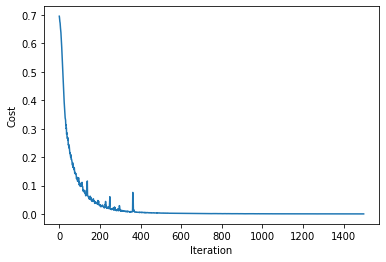

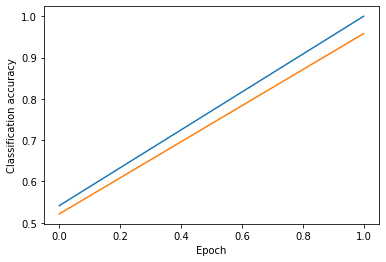

In [20]:
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.tight_layout
plt.show()

In [21]:
y_pred = Net.predict(X_val)
confmat = cm(y_val,y_pred)
Accuracy = (confmat[0][0]+confmat[1][1])/len(y_val)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
print(confmat)
print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}")

[[208   0]
 [  0 222]]
Accuracy: 100.0%
Sensitivity: 1.0
Specificity: 1.0


##Q4. 
Implement the radial basis function neural network (RBFNN) for the classification problem. You can
use Gaussian, multiquadric and linear kernel functions for the implementation. You can use both
holdout (70, 10, and 20%) and 5-fold cross-validation approaches for evaluating the performance
of the classifier (individual accuracy and overall accuracy). The dataset (data5.mat) contains 72
features and the last column is the output (class labels). (Packages such as keras, tensorflow,
pytorch for python and MATLAB deep learning toolbox etc. are not allowed). [Marks=5]

In [22]:
np.random.seed(1)
f = loadmat('data5.mat')
D = f['x']
np.random.shuffle(D)

In [23]:
def gaussian_kernel(x,center,sigma,beta):
    return np.exp(-beta * (np.linalg.norm(x - center)) ** 2)

def multi_quadric_kernel(x, center, sigma, beta):
    return ((np.linalg.norm(x - center)) ** 2 + sigma ** 2) ** 0.5

def linear_kernel(x, center, sigma, beta):
    return np.linalg.norm(x - center)

X_tot, y_tot = preprocess(D)

train_X = X_tot[ : 1600]
train_y = y_tot[ : 1600]
test_X = X_tot[1600 : 2148]
test_y = y_tot[1600 : 2148]

def rbfnn_train(train_X, train_y, test_X, test_y):
    centers, labels = kmeans_cluster(train_X,K=550)

    sigma = np.zeros((len(centers), 1))
    beta = np.zeros((len(centers), 1))
    cluster_size = np.zeros((len(centers), 1))

    for i in range(len(train_X)):
        sigma[labels[i]] += np.linalg.norm(train_X[i] - centers[labels[i]])
        cluster_size[labels[i]] += 1

    sigma /= cluster_size
    beta = 1 / 2 * (sigma * sigma + 1e-6)

    H = np.zeros((len(train_X), len(centers)))

    for i in range(len(train_X)):
        for j in range(len(centers)):
            H[i, j] = linear_kernel(train_X[i], centers[j], sigma[j], beta[j])

    W = np.dot(np.linalg.pinv(H), train_y)

    #Test run
    H_test = np.zeros([len(test_X), len(centers)])
    for i in range(len(test_X)):
        for j in range(len(centers)):
            H_test[i, j] = linear_kernel(test_X[i], centers[j], sigma[j], beta[j])

    y_pred = np.dot(H_test, W)
    for i in range(len(y_pred)):
        y_pred[i] = 1 if y_pred[i]>=0.5 else 0
        
    accuracy = 0    
    for i in range(len(y_pred)):
        if y_pred[i] == test_y[i]:
            accuracy +=1
    accuracy /= len(y_pred)
    print(accuracy)
    return y_pred, accuracy

In [24]:
def kmeans_cluster(X,K=3,max_iter=5000):
    m,n = np.shape(X)
    def create_dict(n):
        a = {}
        for i in range(n):
            a[f'{i}'] = []
        return a 
    def calc_distance(A,B):
       return np.linalg.norm(A-B,2)
    def return_cluster(C_ind,ind):
        for i in C_ind.keys():
            if ind in C_ind[i]:
                return int(i)
    index_random = np.random.randint(0,m,K)
    C = []
    for i in range(K):
        C.append(X[index_random[i]])
    NC = np.zeros((K,n))
    st = False
    iter = 0
    while True:
        if iter == max_iter or st:
            break
        C_ind = create_dict(K)
        for i in range(m):
            d = []
            for j in range(K):
                d.append(calc_distance(X[i],C[j]))
            index = np.argmin(d)
            C_ind[f'{index}'].append(i) 
        for i in range(K):
            c1_ind = C_ind[f'{i}']
            if len(c1_ind):
                for j in range(len(c1_ind)):
                    NC[i] += X[c1_ind[j]]
                NC[i] /= len(c1_ind)
        if (C==NC).all():
            st = True
        C = NC
        iter += 1
    labels = []
    for i in range(m):
        labels.append(return_cluster(C_ind,i))
    return C,labels

In [25]:
y_pred, _ = rbfnn_train(train_X, train_y, test_X, test_y)
for i in range(len(y_pred)):
    y_pred[i] = 1 if y_pred[i] > 0.5 else 0

confmat = cm(test_y, y_pred)

Accuracy = (confmat[0][0]+confmat[1][1])/len(y_pred)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
print("Confusion Matrix:")
print(confmat)
print("\n")
print(f"Accuracy: {Accuracy}\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}\n")

avg_acc = 0
# K - fold cross validation

for k in range(5):
    X = X_tot[0 : 1718]
    y = y_tot[0 : 1718]
    X_val = X_tot[1718 :]
    y_val = y_tot[1718 :]
    print(f'Fold {k+1}:')
    print("Accuracy: ", end="")
    _, acc = rbfnn_train(X, y, X_val, y_val)
    print("----------------------")
    avg_acc += acc
    X_tot[0 : 430] = X_val
    X_tot[430 : ] = X
    y_tot[0 : 430] = y_val
    y_tot[430 : ] = y

avg_acc /= 5
print(f'\nAverage Accuracy: {avg_acc*100}%')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


0.9726277372262774
Confusion Matrix:
[[271   9]
 [  6 262]]


Accuracy: 0.9726277372262774
Sensitivity: 0.9776119402985075
Specificity: 0.9678571428571429

Fold 1:
Accuracy: 0.9767441860465116
----------------------
Fold 2:
Accuracy: 0.9441860465116279
----------------------
Fold 3:
Accuracy: 0.9488372093023256
----------------------
Fold 4:
Accuracy: 0.9465116279069767
----------------------
Fold 5:
Accuracy: 0.9488372093023256
----------------------

Average Accuracy: 95.30232558139534%


##Q5. 
Implement the stacked autoencoder based deep neural network for the classification problem. The
deep neural network must contain 3 hidden layers from three autoencoders. You can use holdout
(70, 10, and 20%) cross-validation technique for selecting, training and test instances for the
classifier. The dataset (data5.mat) contains 72 features and the last column is the output (class
labels). For autoencoder implementation, please use back propagation algorithm which has been
already taught in the class. Evaluate individual accuracy and overall accuracy. (Packages such as
keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are not allowed)
[Marks=5]

In [26]:
f = loadmat('data5.mat')
D = f['x']
np.random.seed(1)
np.random.shuffle(D)

def preprocess(data):
    X = np.array(data[ : , :-1], dtype = float)
    y = np.array(data[ : , -1], dtype = int)
    X = (X - X.mean(axis = 0))/X.std(axis = 0)
    return X, y

X, y = preprocess(D)
X_train, y_train = X[ :int(0.7 * len(X))], y[ :int(0.7 * len(X))]
X_val, y_val = X[ int(0.7 * len(X)): ], y[ int(0.7 * len(X)): ]

alpha = 0.5

In [27]:
def sigmoid(x, derivative=False):
        if (derivative == True):
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

In [28]:
class NeuralNet(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.W = {}
        self.a = {}
        self.b = {}
        for i in range(1, self.num_layers):
            self.W[i] = np.random.randn(self.sizes[i-1], self.sizes[i])
        for i in range(1, self.num_layers):
            self.b[i] = np.random.randn(self.sizes[i], 1)
        for i in range(1, self.num_layers):
            self.a[i] = np.zeros([self.sizes[i], 1])
    def forward_prop(self, X):
        self.a[0] = X
        for i in range(1, self.num_layers):
            self.a[i] = sigmoid(np.dot(self.W[i].T, self.a[i-1]) + self.b[i])

        return self.a[self.num_layers-1] 
    def backward_prop(self, X, Y, output):
        
        self.d = {}
        self.d_output = (Y - output) * sigmoid(output, derivative=True)
        self.d[self.num_layers-1] = self.d_output
        for i in range(self.num_layers-1, 1, -1):
            self.d[i-1] = np.dot(self.W[i], self.d[i]) * sigmoid(self.a[i-1], derivative=True)
        for i in range(1, self.num_layers-1):
            self.W[i] += alpha * np.dot(self.a[i-1], self.d[i].T)
        for i in range(1, self.num_layers-1):
            self.b[i] += alpha * self.d[i]

    def train(self, X, Y):
        X = np.reshape(X, (len(X), 1))
        output = self.forward_prop(X)
        self.backward_prop(X, Y, output)
    
    def get_W(self):
        return self.W
    
    def load_W(self, W):
        self.W = W
    
    def get_a(self, x):
        x = np.reshape(x, (len(x), 1))
        self.forward_prop(x)
        return self.a
    
    def load_a(self, a):
        self.a = a

In [29]:
#Cost function
def compute_cost(NN,x ,y):
    
    cost = 0
    for i in range(len(x)):
        x_ = np.reshape(x[i], (len(x[i]), 1))
        cost += 0.5 / len(x) * np.sum((y[i] - NN.forward_prop(x_)) ** 2)
    
    return cost
autoencoder1 = NeuralNet([72, 60, 72])
autoencoder2 = NeuralNet([60,40,60])
autoencoder3 = NeuralNet([40, 30, 40])
NN = NeuralNet([72,60,40,30, 1])

In [30]:
print("Autoencoder 1")
for i in range(200):
    for j, row in enumerate(X_train):
        row = np.reshape(row, (72,1))
        autoencoder1.train(row, row)
    cost = compute_cost(autoencoder1, X_train, X_train)
    if (i+1)%100 == 0:
        print(f"Epoch: {i+1}, Cost: {cost}")
autoencoder2_input = []
for row in X_train:
    autoencoder2_input.append(autoencoder1.get_a(row)[1])
autoencoder2_input = np.array(autoencoder2_input)
print("Autoencoder 2")
for i in range(200):
    for j, row in enumerate(autoencoder2_input):
        row = np.reshape(row, (60,1))
        autoencoder2.train(row, row)
    cost = compute_cost(autoencoder2, autoencoder2_input, autoencoder2_input)
    if (i+1)%100 == 0:
        print(f"Epoch: {i+1}, Cost: {cost}")
autoencoder3_input = []
for row in autoencoder2_input:
    autoencoder3_input.append(autoencoder2.get_a(row)[1])
autoencoder3_input = np.array(autoencoder3_input)
print("Autoencoder 3")
for i in range(200):
    for j, row in enumerate(autoencoder3_input):
        row = np.reshape(row, (40,1))
        autoencoder3.train(row, row)
    cost = compute_cost(autoencoder3, autoencoder3_input, autoencoder3_input)
    if (1+i)%100 == 0:
        print(f"Epoch: {i+1}, Cost: {cost}")
W1 = autoencoder1.get_W()[1]
W2 = autoencoder2.get_W()[1]
W3 = autoencoder3.get_W()[1]
W_final = {}
W_final[1] = W1
W_final[2] = W2
W_final[3] = W3
W_final[4] = np.random.randn(30, 1)
NN.load_W(W_final)

Autoencoder 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch: 100, Cost: 3283.4387171215894
Epoch: 200, Cost: 3280.4393780998835
Autoencoder 2
Epoch: 100, Cost: 5.2587626148591635
Epoch: 200, Cost: 5.260490968942181
Autoencoder 3
Epoch: 100, Cost: 2.415718256975852
Epoch: 200, Cost: 2.413434348329526


In [31]:
for i in range(500):
    if (i+1)%100==0:
        print("Epoch: ", i+1)
    for j in range(len(X_train)):
        NN.train(X_train[j], y_train[j])
y_pred = []
for i in range(len(X_val)):
    x = np.reshape(X_val[i], (len(X_val[i]), 1))
    x = NN.forward_prop(x)
    p = 0 if x[0] < 0.5 else 1
    y_pred.append(p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500


In [32]:
confmat = cm(y_val, y_pred)
Accuracy = (confmat[0][0]+confmat[1][1])/len(y_pred)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
print("Confusion Matrix:")
print(confmat)
print("\n")
print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}\n")

Confusion Matrix:
[[284  41]
 [ 30 290]]


Accuracy: 88.9922480620155%
Sensitivity: 0.90625
Specificity: 0.8738461538461538



##Q6. 
Implement extreme learning machine (ELM) classifier for the classification. You can use Gaussian
and tanh activation functions. Please select the training and test instances using 5-fold cross-
validation technique Evaluate individual accuracy and overall accuracy. The dataset (data5.mat)
contains 72 features and the last column is the output (class labels). (Packages such as keras,
tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are not allowed) [Marks=5]

In [33]:
f = loadmat('data5.mat')
D = f['x']
np.random.seed(1)
np.random.shuffle(D)
X_tot, y_tot = preprocess(D)
X_tot = np.insert(X_tot, 0, 1, axis=1)
labels = D[:, -1]
y = np.zeros([len(X_tot), 2])

In [34]:
def gaussian(X, a, b):   
    K = np.zeros((X.shape[0], hidden_neurons))
    for i in range(K.shape[0]):
        for j in range(K.shape[1]):
            K[i,j] = np.exp(-b[j] * np.linalg.norm(a[:,j] - X[i,:]))  
    return K
def tanh(X):
    return np.tanh(X)
def preprocess(data):
    X = np.array(data[ : , :-1], dtype = float)
    y = np.array(data[ : , -1], dtype = int)
    X = normalize(X, axis = 0)
    return X, y

In [35]:
for i in range(len(labels)):
    if labels[i] == 1:
        y[i,1] = 1.0
    elif labels[i] == 0:
        y[i,0] = 1.0
hidden_neurons = 400
output_neurons = 2

In [36]:
print("Gaussian accuracies: ")
acc = 0
for k in range(5):
    X_train = X_tot[0 : 1718]
    y_train = y[0 : 1718]
    X_val = X_tot[1718 :]
    y_val = y[1718 :]
    a = np.random.rand(X_train.shape[1], hidden_neurons) 
    b = np.random.rand(hidden_neurons)
    H = gaussian(X_train, a, b)
    H_inv = np.linalg.pinv(H)
    W2 = np.matmul(H_inv, y_train)
    H_T = gaussian(X_val, a, b)
    y_pred = np.matmul(H_T, W2)
    print(f'Fold {k+1}:\n')
    a = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
    b= [np.argmax(y_val[i]) for i in range(len(y_val))]
    confmat = cm(b,a)
    print("Confusion Matrix:\n")
    print(confmat)
    Accuracy = (confmat[0][0]+confmat[1][1])/len(y_val)
    acc += Accuracy
    Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
    Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
    print(f"Accuracy: {Accuracy}\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}")
    print("-------------------------------------------")
    X_tot[0 : 430] = X_val
    X_tot[430 : ] = X_train
    y[0 : 430] = y_val
    y[430 : ] = y_train
print(f"Overall Accuracy: {acc*100/5}%")

Gaussian accuracies: 
Fold 1:

Confusion Matrix:

[[204  17]
 [ 15 194]]
Accuracy: 0.9255813953488372
Sensitivity: 0.9282296650717703
Specificity: 0.9230769230769231
-------------------------------------------
Fold 2:

Confusion Matrix:

[[188  19]
 [ 16 207]]
Accuracy: 0.9186046511627907
Sensitivity: 0.9282511210762332
Specificity: 0.9082125603864735
-------------------------------------------
Fold 3:

Confusion Matrix:

[[207  14]
 [ 13 196]]
Accuracy: 0.9372093023255814
Sensitivity: 0.937799043062201
Specificity: 0.9366515837104072
-------------------------------------------
Fold 4:

Confusion Matrix:

[[187  27]
 [ 12 204]]
Accuracy: 0.9093023255813953
Sensitivity: 0.9444444444444444
Specificity: 0.8738317757009346
-------------------------------------------
Fold 5:

Confusion Matrix:

[[199  22]
 [  9 200]]
Accuracy: 0.9279069767441861
Sensitivity: 0.9569377990430622
Specificity: 0.9004524886877828
-------------------------------------------
Overall Accuracy: 92.37209302325581%


In [37]:
y_pred_full = []
print("Tanh accuracies:\n")
acc = 0
for k in range(5):
    X_train = X_tot[0 : 1718]
    y_train = y[0 : 1718]
    X_val = X_tot[1718 :]
    y_val = y[1718 :]
    a = np.random.rand(X_train.shape[1],hidden_neurons) 
    b = np.random.rand(hidden_neurons)
    H = tanh(X_train)
    H_inv = np.linalg.pinv(H)
    W2 = np.matmul(H_inv, y_train)
    H_T = tanh(X_val)
    y_pred = np.matmul(H_T, W2)
    print(f'Fold {k+1}:\n')
    a = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
    b= [np.argmax(y_val[i]) for i in range(len(y_val))]
    confmat = cm(b,a)
    print("Confusion Matrix:\n")
    print(confmat)
    Accuracy = (confmat[0][0]+confmat[1][1])/len(y_val)
    acc += Accuracy
    Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
    Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
    print(f"Accuracy: {Accuracy}\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}")
    print("-----------------------------------------------")
    X_tot[0 : 430] = X_val
    X_tot[430 : ] = X_train
    y[0 : 430] = y_val
    y[430 : ] = y_train
print(f"Overall Accuracy: {acc*100/5}%")

Tanh accuracies:

Fold 1:

Confusion Matrix:

[[172  36]
 [ 26 196]]
Accuracy: 0.8558139534883721
Sensitivity: 0.8828828828828829
Specificity: 0.8269230769230769
-----------------------------------------------
Fold 2:

Confusion Matrix:

[[199  22]
 [ 23 186]]
Accuracy: 0.8953488372093024
Sensitivity: 0.8899521531100478
Specificity: 0.9004524886877828
-----------------------------------------------
Fold 3:

Confusion Matrix:

[[177  37]
 [ 19 197]]
Accuracy: 0.8697674418604651
Sensitivity: 0.9120370370370371
Specificity: 0.8271028037383178
-----------------------------------------------
Fold 4:

Confusion Matrix:

[[190  31]
 [ 24 185]]
Accuracy: 0.872093023255814
Sensitivity: 0.8851674641148325
Specificity: 0.8597285067873304
-----------------------------------------------
Fold 5:

Confusion Matrix:

[[171  36]
 [ 25 198]]
Accuracy: 0.858139534883721
Sensitivity: 0.8878923766816144
Specificity: 0.8260869565217391
-----------------------------------------------
Overall Accuracy: 87.023

##Q7.
 Implement a deep neural network, which contains two hidden layers (the hidden layers are
obtained from the ELM-autoencoders). The last layer will be the ELM layer which means the second
hidden layer feature vector is used as input to the ELM classifier. The network can be called as deep
layer stacked autoencoder based extreme learning machine. You can use holdout approach (70, 10,
20%) for evaluating the performance of the classifier. The dataset (data5.mat) contains 72 features
and the last column is the output (class labels). Evaluate individual accuracy and overall accuracy.
(Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are
not allowed) [Marks=5]

In [38]:
from sklearn.preprocessing import normalize

In [39]:
mat_contents = loadmat('data5.mat')
data = mat_contents['x']
np.random.seed(1)
np.random.shuffle(data)

In [40]:
def preprocess():
    X = np.array(data[ : , :-1], dtype = float)
    y = np.array(data[ : , -1], dtype = int)
    X = normalize(X, axis = 0)
    return X, y
X, y_ = preprocess()
y = np.zeros((len(y_), 2))
for i in range(len(y_)):
    if y_[i]==1:
        y[i,1] = 1.0
    elif y_[i]==0:
        y[i,0] = 1.0
X_train, y_train = X[ :int(0.7 * len(X))], y[ :int(0.7 * len(X))]
X_val, y_val = X[ int(0.7 * len(X)): ], y[ int(0.7 * len(X)): ]
alpha = 0.5

In [41]:
def sigmoid(x, derivative=False):
        if (derivative == True):
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
def tanh(x):
    return np.tanh(x)
def calc_cost(NN,x ,y):
    cost = 0
    for i in range(len(x)):
        x_ = np.reshape(x[i], (len(x[i]), 1))
        cost += 0.5 / len(x) * np.sum((y[i] - NN.forward_pass(x_)) ** 2)
    return cost

In [42]:
class NeuralNetwork(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.W = {}
        self.a = {}
        self.b = {}
        for i in range(1, self.num_layers):
            self.W[i] = np.random.randn(self.sizes[i-1], self.sizes[i])
        for i in range(1, self.num_layers):
            self.b[i] = np.random.randn(self.sizes[i], 1)
        for i in range(1, self.num_layers):
            self.a[i] = np.zeros([self.sizes[i], 1])
    def forward_pass(self, X):
        self.a[0] = X
        for i in range(1, self.num_layers):
            self.a[i] = sigmoid(np.dot(self.W[i].T, self.a[i-1]) + self.b[i])
        return self.a[self.num_layers-1] 
    def backward_pass(self, X, Y, output):
        self.d = {}
        self.d_output = (Y - output) * sigmoid(output, derivative=True)
        self.d[self.num_layers-1] = self.d_output
        for i in range(self.num_layers-1, 1, -1):
            self.d[i-1] = np.dot(self.W[i], self.d[i]) * sigmoid(self.a[i-1], derivative=True)
        for i in range(1, self.num_layers-1):
            self.W[i] += alpha * np.dot(self.a[i-1], self.d[i].T)
        for i in range(1, self.num_layers-1):
            self.b[i] += alpha * self.d[i]
    def train(self, X, Y):
        X = np.reshape(X, (len(X), 1))
        output = self.forward_pass(X)
        self.backward_pass(X, Y, output)
    def get_W(self):
        return self.W
    def load_W(self, W):
        self.W = W  
    def get_a(self, x):
        x = np.reshape(x, (len(x), 1))
        self.forward_pass(x)
        return self.a
    def load_a(self, a):
        self.a = a

In [43]:
autoencoder1 = NeuralNetwork([72, 60, 72])
autoencoder2 = NeuralNetwork([60,40,60])
print("Autoencoder 1 Pre-Training")
for i in range(500):
    for j, row in enumerate(X_train):
        row = np.reshape(row, (72,1))
        autoencoder1.train(row, row)
    cost = calc_cost(autoencoder1, X_train, X_train)
    if (i+1)%100 == 0:
        print(f"Epoch {i+1}, Cost {cost}")
autoencoder2_input = []
for row in X_train:
    autoencoder2_input.append(autoencoder1.get_a(row)[1])
autoencoder2_input = np.array(autoencoder2_input)
print("----------------------------")
print("Autoencoder 2 Pre-Training")
#Autoencoder 2 pre-training
for i in range(500):
    for j, row in enumerate(autoencoder2_input):
        row = np.reshape(row, (60,1))
        autoencoder2.train(row, row)
        
    cost = calc_cost(autoencoder2, autoencoder2_input, autoencoder2_input)
    if (i+1)%100 == 0:
        print(f"Epoch {i+1}, Cost {cost}")

Autoencoder 1 Pre-Training
Epoch 100, Cost 372.09203520113647
Epoch 200, Cost 372.0658432344584
Epoch 300, Cost 372.05983340422824
Epoch 400, Cost 372.0585230556606
Epoch 500, Cost 372.0587797347227
----------------------------
Autoencoder 2 Pre-Training
Epoch 100, Cost 5.760830264321385
Epoch 200, Cost 5.7606821147182705
Epoch 300, Cost 5.76061414935539
Epoch 400, Cost 5.760571632624941
Epoch 500, Cost 5.760540489032467


In [44]:
elm_input = []
for row in autoencoder2_input:
    elm_input.append(autoencoder2.get_a(row)[1])   
elm_input = np.array(elm_input)
elm_neurons = 300
output_neurons = 2
W_elm = np.random.randn(elm_input.shape[1], elm_neurons)
np.random.seed(1)
elm_input = np.reshape(elm_input, (1503, 40))
H = np.matmul(elm_input, W_elm)
H = tanh(H)
H_inv = np.linalg.pinv(H)
W_final = np.matmul(H_inv, y_train) 

In [45]:
layer1_out = []
for i, row in enumerate(X_val):
    act = autoencoder1.get_a(row)[1]
    layer1_out.append(act)
layer1_out = np.array(layer1_out)
layer1_out = np.reshape(layer1_out, (645, 60))
layer2_out = []
for i, row in enumerate(layer1_out):
    act = autoencoder2.get_a(row)[1]
    layer2_out.append(act)
layer2_out = np.array(layer2_out)
layer2_out = np.reshape(layer2_out, (645, 40))
H_T = np.matmul(layer2_out, W_elm)
H_T = tanh(H_T)
y_pred = np.matmul(H_T, W_final)

In [46]:
a = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
b = [np.argmax(y_val[i]) for i in range(len(y_val))]

confmat = cm(b,a)

Accuracy = (confmat[0][0]+confmat[1][1])/len(y_pred)
Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
print("Confusion Matrix:")
print(confmat)
print("\n")
print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}\n")

Confusion Matrix:
[[275  50]
 [ 63 257]]


Accuracy: 82.48062015503876%
Sensitivity: 0.803125
Specificity: 0.8461538461538461



##Q8. 
Implement support vector machine (SupportVectorMachine) classifier for the multi-class classification task. You can
use one vs one and one vs all multiclass coding methods to create binary SupportVectorMachine models. Implement
the SMO algorithm for the evaluation of the training parameters of SupportVectorMachine such as Lagrange
multipliers. You can use holdout approach (70, 10, 20%) for evaluating the performance of the
classifier. The dataset (data5.mat) contains 72 features and the last column is the output (class
labels). Evaluate individual accuracy and overall accuracy. (Packages such as keras, tensorflow,
pytorch for python and MATLAB deep learning toolbox etc. are not allowed) [Marks=10]

In [47]:
import random as rnd
from __future__ import division, print_function

In [48]:
mat = loadmat('data5.mat')
x = mat['x']
x = np.asarray(x)
np.random.seed(1)
np.random.shuffle(x)
x.shape
len = x.shape[0]
m_train = int(0.7 * len)
m_val = int((0.1 * len) + 1)
m_test = int((0.2 * len) + 1)
train_data = x[0:m_train,:]
val_data = x[m_train+1:m_train+1+m_val,:]
test_data = x[m_train+m_val+1:,:]
x_train = train_data[:,0:72]
y_train = train_data[:,-1]
x_val = val_data[:,0:72]
y_val = val_data[:,-1]
x_test = test_data[:,0:72]
y_test = test_data[:,-1]
for i in range(y_train.shape[0]):
  y_train[i] = int(y_train[i])
  if int(y_train[i]) == 0:
    y_train[i] = -1
for i in range(y_val.shape[0]):
  y_val[i] = int(y_val[i])
  if int(y_val[i]) == 0:
    y_val[i] = -1
for i in range(y_test.shape[0]):
  y_test[i] = int(y_test[i])
  if int(y_test[i]) == 0:
    y_test[i] = -1

In [73]:
mat =loadmat('data5.mat')
data = mat['x']
data = np.asarray(data)
np.random.seed(42)
np.random.shuffle(data)

In [74]:
class SupportVectorMachine():
    def __init__(self, max_iter=5000, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) 
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

            if count >= self.max_iter:
                return

        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)

        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)

    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i

    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)

In [75]:
def print_acc(y_pred,y_actual):
    confmat = cm(y_actual, y_pred)
    Accuracy = (confmat[0][0]+confmat[1][1])/ (np.shape(y_pred)[0])
    Sensitivity = (confmat[1][1])/(confmat[1][0] + confmat[1][1])
    Specificity = (confmat[0][0])/(confmat[0][0] + confmat[0][1])
    print("Confusion Matrix:")
    print(confmat)
    print("\n")
    print(f"Accuracy: {Accuracy*100}%\nSensitivity: {Sensitivity}\nSpecificity: {Specificity}\n")

In [78]:
svm = SupportVectorMachine()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print_acc(y_pred,y_test)

Confusion Matrix:
[[180  40]
 [ 47 162]]


Accuracy: 79.72027972027972%
Sensitivity: 0.7751196172248804
Specificity: 0.8181818181818182



##Q9.
 Implement a multi-channel 1D deep CNN architecture for the seven-class classification task. The
input and the class labels are given in .mat file format. There is a total of 17160 number of instances
present in both input and class-label data files. The input data for each instance is a multichannel
time series (12-channel) with size as (12 ×800). The class label for each multichannel time series
instance is given in the class_label.mat file. You can select the training and test instances using hold-
out cross-validation (70% training, 10% validation, and 20% testing). The architecture of the multi-
channel deep CNN is given as follows. The number of filters, length of each filter, and number of
neurons in the fully connected layers are shown in the following figure. Evaluate individual accuracy
and overall accuracy. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep
learning toolbox etc. are allowed) [Marks=10]
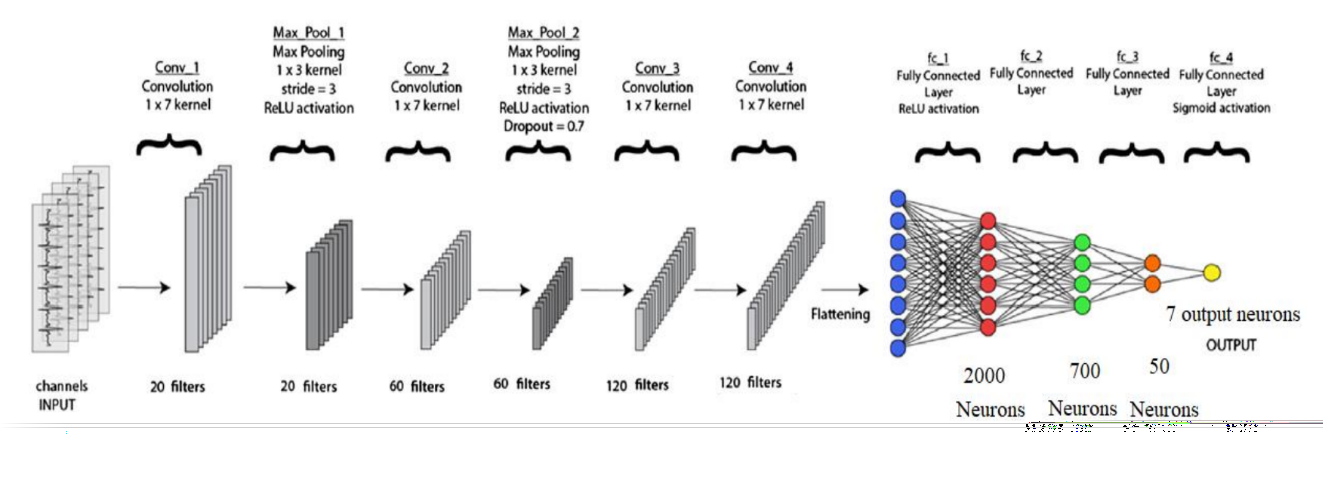

In [53]:
import keras 
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import scipy.io as sio 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Flatten, Conv1D, Dropout,MaxPooling1D,MaxPool1D
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from sklearn.utils import shuffle
from scipy.io import loadmat

In [54]:
X_=loadmat('input.mat')
X_=pd.DataFrame(X_["x"])
X_=(np.asarray(X_)).T
Y_=loadmat('class_label.mat')
datay=np.asarray(Y_["y"])
datay.shape

(17160, 1)

In [55]:
X=[]
for i in range(X_.shape[0]):
  X.append(X_[i][0])
X=np.asarray(X)
X=X.transpose(0,2,1)
for i in range(X_.shape[0]):
  X[i]=preprocessing.normalize(X[i])
y=[]
for i in range(X_.shape[0]):
  y.append(datay[i][0]-1)
y=np.asarray(y)
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=2/10,train_size=8/10,random_state=42)
train_X,valid_X,train_y,valid_y=train_test_split(train_X,train_y,test_size=1/8,train_size=7/8,random_state=42)

In [56]:
model = Sequential()
model.add(Conv1D(kernel_size=7, filters=20, input_shape=(800,12)))
model.add(MaxPooling1D(pool_size=3, strides=3))
model.add(Activation("relu"))
model.add(Conv1D(kernel_size=7,filters=60))
model.add(MaxPooling1D(pool_size=3,strides=3))
model.add(Activation("relu"))
model.add(Dropout(0.7))
model.add(Conv1D(filters=120,kernel_size=7))
model.add(Conv1D(filters=120,kernel_size=7))
model.add(Flatten())
model.add(Dense(2000,activation="relu"))
model.add(Dense(700))
model.add(Dense(50))
model.add(Dense(7,activation="sigmoid"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_X, train_y, epochs=10, batch_size=1000,validation_data=(valid_X,valid_y),)
print(history)
loss, acc = model.evaluate(test_X,test_y)

Epoch 1/10
13/13 [==============================] - 51s 4s/step - loss: 1.7976 - accuracy: 0.2926 - val_loss: 1.4704 - val_accuracy: 0.3059
Epoch 2/10
13/13 [==============================] - 50s 4s/step - loss: 1.3330 - accuracy: 0.3278 - val_loss: 1.2430 - val_accuracy: 0.4138
Epoch 3/10
13/13 [==============================] - 50s 4s/step - loss: 0.9312 - accuracy: 0.5823 - val_loss: 0.8680 - val_accuracy: 0.7040
Epoch 4/10
13/13 [==============================] - 50s 4s/step - loss: 0.4947 - accuracy: 0.7888 - val_loss: 1.0808 - val_accuracy: 0.7809
Epoch 5/10
13/13 [==============================] - 50s 4s/step - loss: 0.3679 - accuracy: 0.8810 - val_loss: 0.0748 - val_accuracy: 0.9679
Epoch 6/10
13/13 [==============================] - 50s 4s/step - loss: 0.0608 - accuracy: 0.9783 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 50s 4s/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 4.4454e-04 - val_accuracy: 1.0000
Epoch 8/10
13/13

In [57]:
print(f'Accuarcy: {acc*100}%')
print(f'Loss: {loss}')

Accuarcy: 100.0%
Loss: 2.007401781156659e-05


##Q10. 
The two-dimensional time-frequency images of class1, class2, class3 are given in the folders as
class1.zip, class2.zip, class3.zip, respectively. Design a 2D deep CNN classifier for the three-class
classification. Evaluate the classification performance using hold-out cross-validation (70% training,
10% validation, 20% testing), and 10-fold cross-validation methods. Evaluate individual accuracy
and overall accuracy for the multiclass CNN classifier. You can consider 4 convolutional layer, three
pooling layer, and 5 fully connected layers. You can select the number of filters, stride for
convolution and pooling layers, and number of neurons for fully connected layers as per your own
choice. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox
etc. are allowed). You can apply dropout, batch normalization, and regularization to improve the
classification performance. [Marks=10]

In [58]:
import os
from PIL import Image
import glob 
import PIL
import keras 
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import scipy.io as sio 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Dropout,MaxPooling2D,MaxPool2D,BatchNormalization
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from sklearn.utils import shuffle

In [59]:
X=[]
y=[]
img_dir = "/content/drive/MyDrive/3-1/NNFL/edwinthomas_assignment2/data/q10data/class1_images/"
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(0)
img_dir = "/content/drive/MyDrive/3-1/NNFL/edwinthomas_assignment2/data/q10data/class2_images/"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(1)
img_dir = "/content/drive/MyDrive/3-1/NNFL/edwinthomas_assignment2/data/q10data/class3_images/"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(2)

In [60]:
X=np.asarray(X)
y=np.asarray(y)
X=X/255.0

In [61]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)
train_X,valid_X,train_y,valid_y=train_test_split(train_X,train_y,test_size=1/8,train_size=7/8,random_state=0)

In [62]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 8, kernel_size = (3,3), input_shape=(128, 128, 3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(3, 3), padding='same'))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dense(64))
  model.add(Dropout(0.3))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Activation('relu'))
  model.add(Dense(16))
  model.add(Dropout(0.3))
  model.add(Activation('relu'))
  model.add(Dense(3))
  model.add(Activation('softmax'))
  return model

In [63]:
modelf=create_model()
modelf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 32)       

In [64]:
modelf.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=modelf.fit(train_X, train_y, epochs=30, batch_size=15,validation_data=(valid_X,valid_y))
print(history)

Epoch 1/30
34/34 [==============================] - 19s 567ms/step - loss: 1.1137 - accuracy: 0.3512 - val_loss: 1.1018 - val_accuracy: 0.3056
Epoch 2/30
34/34 [==============================] - 19s 563ms/step - loss: 1.1049 - accuracy: 0.3393 - val_loss: 1.0966 - val_accuracy: 0.3056
Epoch 3/30
34/34 [==============================] - 19s 563ms/step - loss: 1.0906 - accuracy: 0.3909 - val_loss: 1.0974 - val_accuracy: 0.3056
Epoch 4/30
34/34 [==============================] - 19s 566ms/step - loss: 1.0863 - accuracy: 0.3968 - val_loss: 1.0779 - val_accuracy: 0.3056
Epoch 5/30
34/34 [==============================] - 19s 566ms/step - loss: 1.0819 - accuracy: 0.4008 - val_loss: 1.0861 - val_accuracy: 0.3056
Epoch 6/30
34/34 [==============================] - 19s 564ms/step - loss: 1.0605 - accuracy: 0.4603 - val_loss: 1.0251 - val_accuracy: 0.6111
Epoch 7/30
34/34 [==============================] - 19s 562ms/step - loss: 1.0161 - accuracy: 0.5337 - val_loss: 0.9647 - val_accuracy: 0.5278

Text(0.5, 0, 'Epochs')

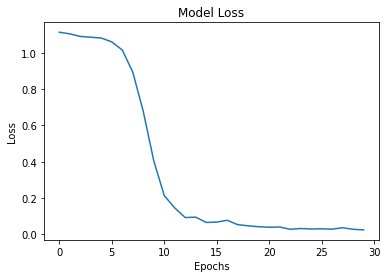

In [65]:
#plotting the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [66]:
#Confusion Matrix
test_y=test_y+1
y_pred=np.argmax(modelf.predict(test_X), axis=-1)+1
cm=pd.crosstab(test_y,y_pred)
print("Confusion matrix:\n")
cm

Confusion matrix:



col_0,1,2,3
row_0,,,
1,42,0,0
2,0,54,0
3,1,0,47


In [67]:
print("Individual class accuracy:")
cm=confusion_matrix(test_y,y_pred)
for i in range(3):
  print(f'Class {i+1} accuracy: ', end="")
  print((cm.diagonal()/cm.sum(axis=1))[i] *100) #Individual Class Accuracy

Individual class accuracy:
Class 1 accuracy: 100.0
Class 2 accuracy: 100.0
Class 3 accuracy: 97.91666666666666


In [69]:
print(f"Overall Accuracy: {np.sum(y_pred==test_y)/test_y.shape[0] *100}%")

Overall Accuracy: 99.30555555555556%


In [70]:
def call_model(tr_x,tr_y):
  modelk=create_model()
  modelk.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  modelk.fit(tr_x,tr_y, epochs=20, batch_size=15,verbose=0,shuffle=False)
  return modelk

In [72]:
j=1
Xs, ys = shuffle(X, y,random_state=0)
kf=KFold(n_splits=10)
accs = 0
for train,test in kf.split(Xs):
    print()
    print(f"Fold {j}:")
    j=j+1
    tr_x,tr_y,ts_x,ts_y=Xs[train],ys[train],Xs[test],ys[test]
    tf.compat.v1.disable_eager_execution()
    y_pred=np.argmax(call_model(tr_x,tr_y).predict(ts_x), axis=-1)
    cm=confusion_matrix(ts_y,y_pred)
    print("Confusion matrix:")
    print(cm)
    print("Individual class accuracy:")
    for i in range(3):
        print(f"Class {i+1}: ", end = "")
        print((cm.diagonal()/cm.sum(axis=1))[i] *100) #Individual Class Accuracy
    acc = np.sum(y_pred==ts_y)/ts_y.shape[0]
    accs += acc
    print(f"Overall Accuracy: {acc*100}%")
    print("--------------------------------------")
print(f"Average Accuracy: {accs*100/10}%")


Fold 1:
Confusion matrix:
[[18  0  0]
 [ 0 21  0]
 [ 0  0 33]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%
--------------------------------------

Fold 2:
Confusion matrix:
[[24  0  0]
 [ 0 33  0]
 [ 0  0 15]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%
--------------------------------------

Fold 3:
Confusion matrix:
[[19  0  0]
 [ 0 31  0]
 [ 0  0 22]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%
--------------------------------------

Fold 4:
Confusion matrix:
[[31  0  0]
 [ 0 23  0]
 [ 0  0 18]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%
--------------------------------------

Fold 5:
Confusion matrix:
[[22  0  0]
 [ 0 27  1]
 [ 0  0 22]]
Individual class accuracy:
Class 1: 100.0
Class 2: 96.42857142857143
Class 3: 100.0
Overall Accuracy: 98.61111111111111%
---------------

##Q12. 
Please write in your own words that what you have learned by solving the Assignment 2.

From simple and intuitive learning methods like hebbian learning to advanced machine learning concepts like Convoutional Neural networks were covered in this assignment.

What I learnt from this assignment were:



*   Implementation of non linear perceptron with hebbian learning.

*   Kernel perceptron

*   Deep feed forward neural network/ multi layer perceptron
*   Radial basis function Neaural network


*   Autencoder


*   Extreme learning machine


*   Support Vector Machine
*   Convolutionl Neural Network

The key advantage of solving this assignment was the satisfaction of conquering the challenging task of not only understanding the above concepts but also implementing them in Python.  







